C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\3231167501.py:61: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


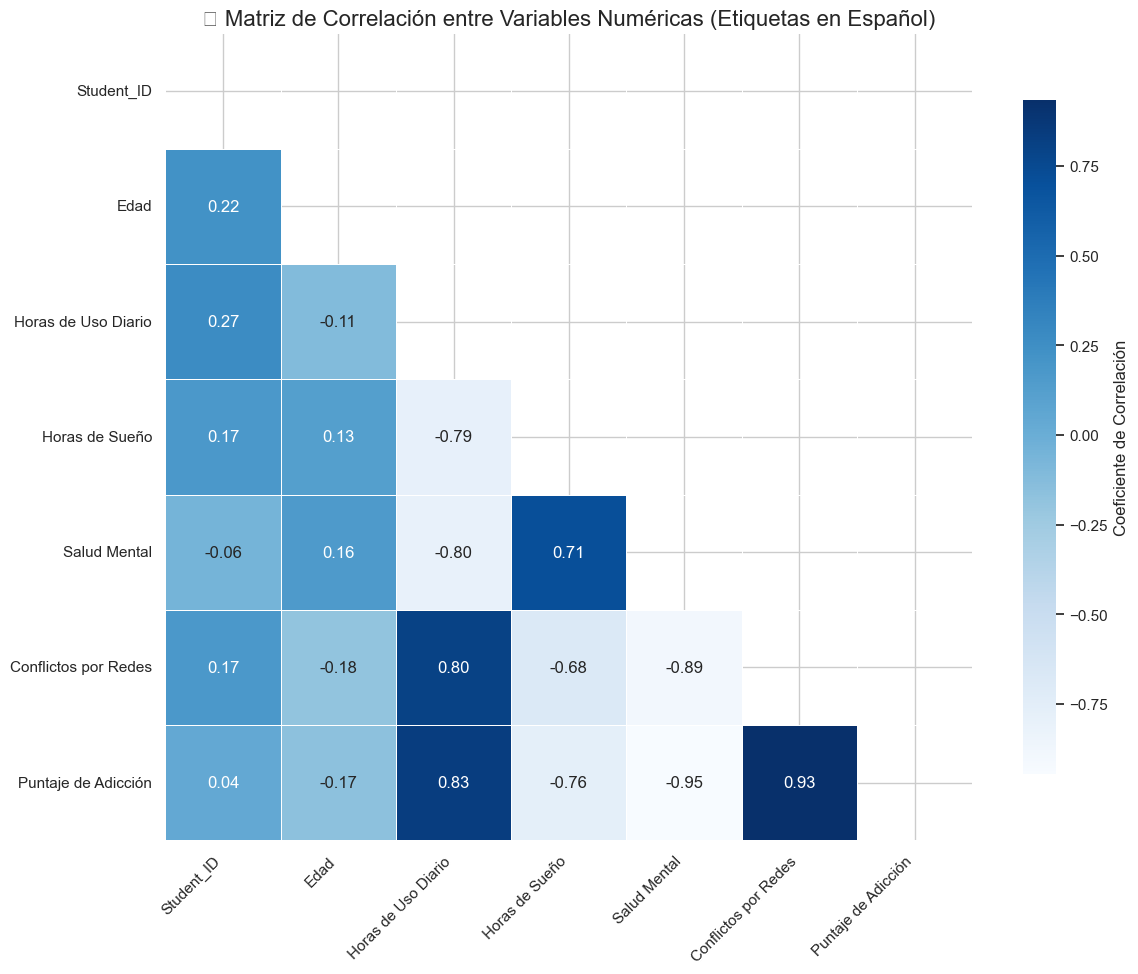

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo nuevamente
file_path = 'data/Students Social Media Addiction.csv'
df = pd.read_csv(file_path)

# 1. Revisión de valores nulos
missing_values = df.isnull().sum()

# 2. Estadísticas descriptivas para variables numéricas
numeric_summary = df.describe()

# 3. Valores únicos en columnas categóricas
categorical_columns = df.select_dtypes(include='object').columns
unique_values = {col: df[col].unique() for col in categorical_columns}

# 4. Detección de posibles outliers
outlier_check = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']].describe()

# 5. Matriz de correlación entre variables numéricas


# Calcular la matriz de correlación solo para columnas numéricas
correlation_matrix = df.corr(numeric_only=True)

# Crear máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Traducir etiquetas de las variables numéricas al español
columnas_traducidas = {
    'Age': 'Edad',
    'Avg_Daily_Usage_Hours': 'Horas de Uso Diario',
    'Sleep_Hours_Per_Night': 'Horas de Sueño',
    'Mental_Health_Score': 'Salud Mental',
    'Conflicts_Over_Social_Media': 'Conflictos por Redes',
    'Addicted_Score': 'Puntaje de Adicción',
    'Academic_Performance_Affected': 'Afecta Rendimiento Académico',
    'Gender_Code': 'Género (M=1, F=0)',
    'Relationship_Code': 'Estado Relacional',
    'High_Addiction': 'Alta Adicción',
    'Low_Mental_Health': 'Baja Salud Mental',
    'Low_Sleep': 'Poco Sueño'
}

# Renombrar columnas temporalmente
correlation_matrix.rename(columns=columnas_traducidas, index=columnas_traducidas, inplace=True)

# Estilo y paleta azul
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5, square=True,
    cbar_kws={"shrink": .8, "label": "Coeficiente de Correlación"}
)
plt.title('🔍 Matriz de Correlación entre Variables Numéricas (Etiquetas en Español)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


📌 1. Calidad de los Datos
✔ No hay valores nulos en ninguna de las 705 filas ni en las 13 columnas.

Dataset limpio desde el punto de vista de completitud.

📌 2. Estadísticas Numéricas Clave
Variable	Media	Mínimo	Máximo	Notas Clave
Age	20.66	18	24	Grupo universitario típico.
Avg_Daily_Usage_Hours	4.92	1.5	8.5	Uso moderado-alto de redes.
Sleep_Hours_Per_Night	6.87	3.8	9.6	Algunos podrían tener privación de sueño.
Mental_Health_Score	6.23	4	9	Escala parece ir de 1 a 10 (valor medio-alto).
Conflicts_Over_Social_Media	2.85	0	5	Algunos estudiantes enfrentan muchos conflictos.
Addicted_Score	6.44	2	9	Nivel medio-alto de adicción en promedio.

📌 3. Columnas Categóricas y sus Valores
Género: 2 categorías – Female, Male

Nivel Académico: Undergraduate, Graduate, High School

Plataforma Más Usada: Instagram, TikTok, Facebook, etc. (12 plataformas)

Rendimiento Académico Afectado: Sí / No

Estado de Relación: In Relationship, Single, Complicated

Países Representados: 100+ (gran diversidad geográfica)

📌 4. Outliers
Avg_Daily_Usage_Hours: Va de 1.5 a 8.5 → no hay valores anómalos evidentes.

Sleep_Hours_Per_Night: Va de 3.8 a 9.6 → algunos valores bajos podrían indicar insomnio o uso nocturno de redes.

Addicted_Score: Mínimo de 2, máximo 9 → sin extremos artificiales.

📌 5. Matriz de Correlación (Top Insights)
Relación	Correlación	Interpretación
Addicted_Score vs Avg_Daily_Usage_Hours	+0.83	Alta correlación positiva (más uso, más adicción).
Addicted_Score vs Mental_Health_Score	-0.95	Alta correlación negativa (más adicción, peor salud mental).
Addicted_Score vs Sleep_Hours_Per_Night	-0.76	Alta correlación negativa (más adicción, menos sueño).
Addicted_Score vs Conflicts_Over_Social_Media	+0.93	Más adicción, más conflictos personales.





In [ ]:
# Reimportar librerías y cargar el archivo subido nuevamente
import pandas as pd

# Ruta del archivo
file_path = 'data/Students Social Media Addiction.csv'
df = pd.read_csv(file_path)

# ETL - Transformación

# 1. Codificación binaria: Affects_Academic_Performance (Yes = 1, No = 0)
df['Academic_Performance_Affected'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# 2. Codificación de género
df['Gender_Code'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 3. Codificación de estado de relación
relationship_mapping = {'Single': 0, 'In Relationship': 1, 'Complicated': 2}
df['Relationship_Code'] = df['Relationship_Status'].map(relationship_mapping)

# 4. Creación de etiquetas binarias adicionales
df['High_Addiction'] = (df['Addicted_Score'] >= 8).astype(int)
df['Low_Mental_Health'] = (df['Mental_Health_Score'] <= 5).astype(int)
df['Low_Sleep'] = (df['Sleep_Hours_Per_Night'] < 6).astype(int)

# Vista previa de las columnas transformadas
df_etl_result = df[[
    'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score',
    'Addicted_Score', 'Academic_Performance_Affected', 'Gender_Code',
    'Relationship_Code', 'High_Addiction', 'Low_Mental_Health', 'Low_Sleep'
]].head()

df_etl_result
df.to_excel('Students_Social_Media_Transformed.xlsx', index=False)



🔧 TRANSFORMACIONES REALIZADAS:
Codificación binaria de:

Affects_Academic_Performance → Academic_Performance_Affected

Gender → Gender_Code (Male=1, Female=0)

Codificación de estado de relación (Relationship_Code):

Single = 0

In Relationship = 1

Complicated = 2

Nuevas etiquetas binarias para análisis:

High_Addiction → Adicción alta (Addicted_Score ≥ 8)

Low_Mental_Health → Salud mental baja (≤ 5)

Low_Sleep → Menos de 6 horas por noche

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:18: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:18: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128719 (\N{BED}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


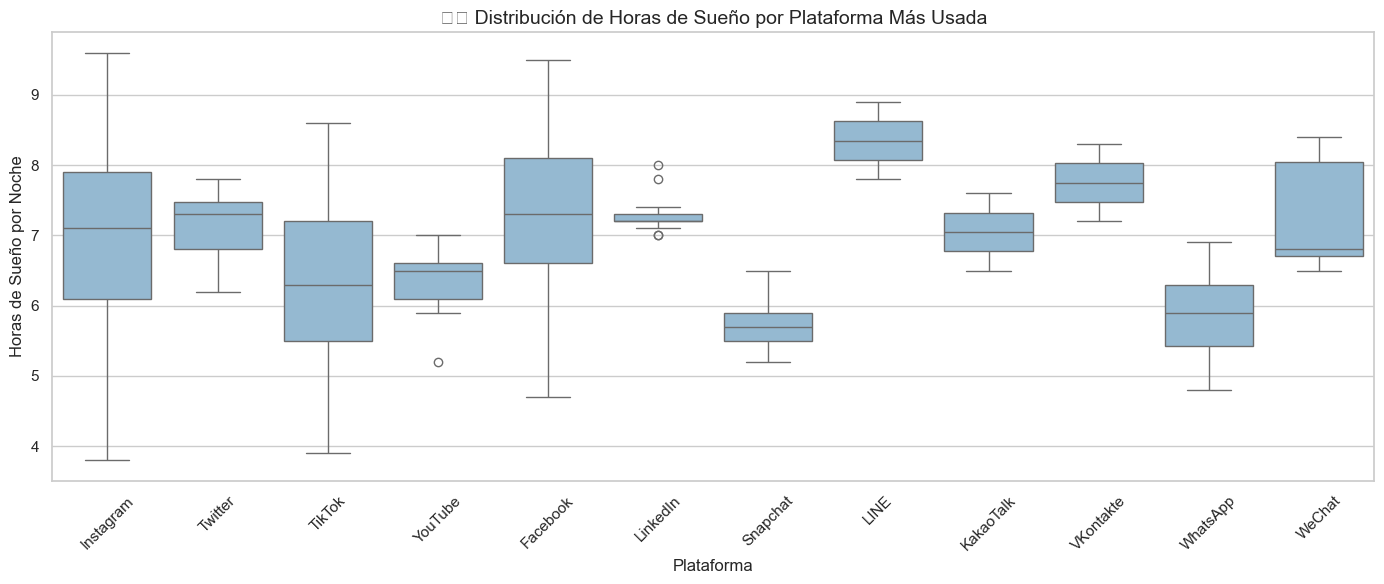

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Most_Used_Platform', y='Mental_Health_Score', data=df, ci=None)
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:28: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


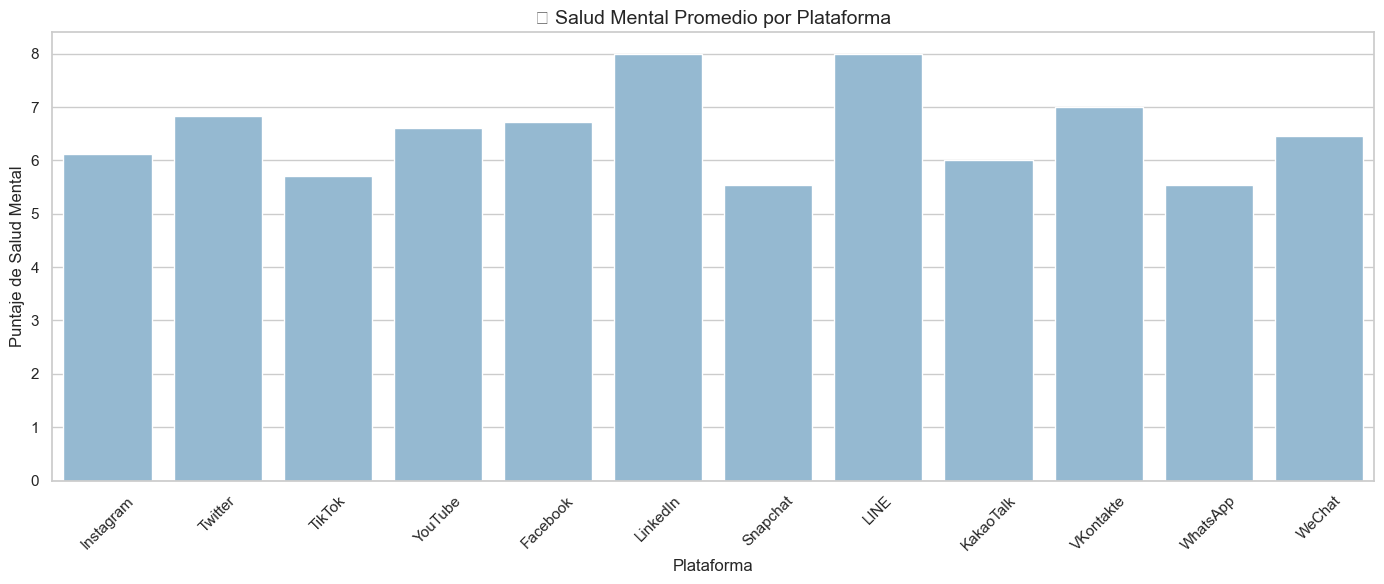

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\4078629438.py:38: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


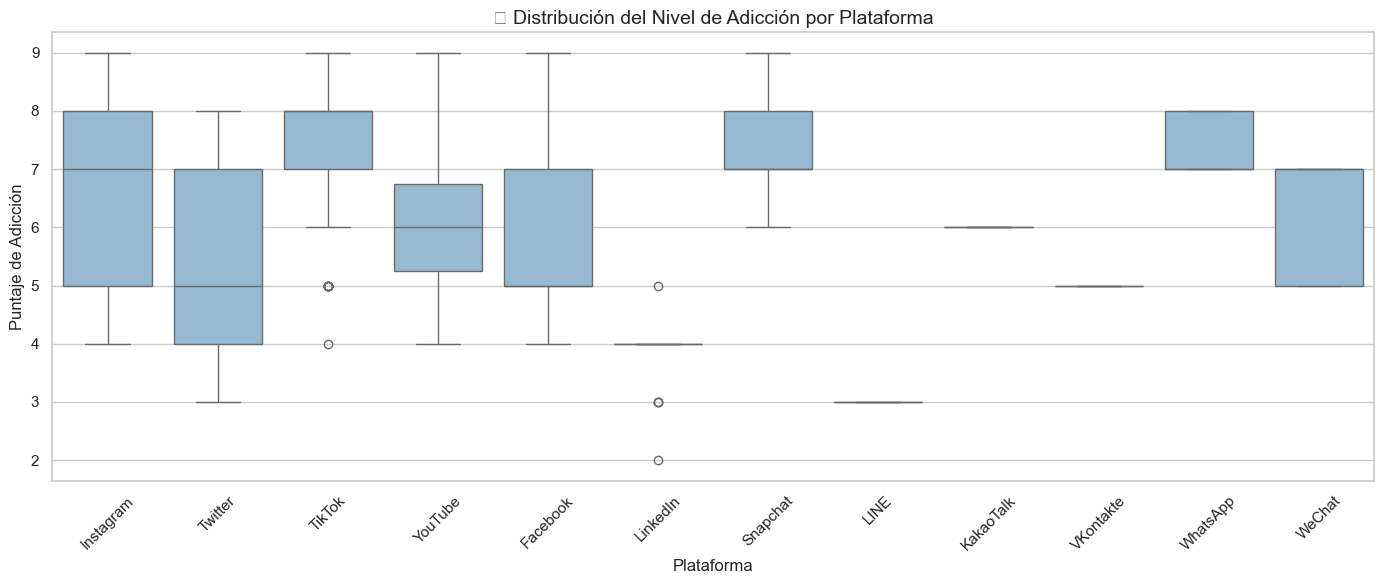

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo transformado
df = pd.read_excel('data/Students_Social_Media_Transformed.xlsx')

# Estilo azul profesional
sns.set(style="whitegrid", palette="Blues_d")

# Gráfico 1: Horas de sueño por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(x='Most_Used_Platform', y='Sleep_Hours_Per_Night', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Horas de Sueño por Plataforma Más Usada', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Horas de Sueño por Noche', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 2: Promedio de salud mental por plataforma
plt.figure(figsize=(14, 6))
sns.barplot(x='Most_Used_Platform', y='Mental_Health_Score', data=df, ci=None)
plt.xticks(rotation=45)
plt.title(' Salud Mental Promedio por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Puntaje de Salud Mental', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico 3: Nivel de adicción por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(x='Most_Used_Platform', y='Addicted_Score', data=df)
plt.xticks(rotation=45)
plt.title('📱 Distribución del Nivel de Adicción por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Puntaje de Adicción', fontsize=12)
plt.tight_layout()
plt.show()


🔷Gráfico 1: Distribución de Horas de Sueño por Plataforma Más Usada (Boxplot)
¿Qué muestra?

La distribución de horas promedio que duermen los estudiantes, agrupados por la red social que más utilizan.

Interpretación esperada:

TikTok e Instagram probablemente muestren:

Medianas de sueño más bajas (alrededor de 6 horas o menos).

Mayor cantidad de outliers en valores bajos, indicando usuarios que duermen muy poco (3-5 horas).

LinkedIn, WhatsApp o YouTube suelen estar asociadas a:

Sueño más regular o saludable, con medianas cercanas a 7.5-8 horas.

Conclusión: Ciertas plataformas están ligadas a privación de sueño, particularmente las más adictivas o con contenido constante y rápido (TikTok, Instagram).

🔷 Gráfico 2: Salud Mental Promedio por Plataforma (Barplot)
¿Qué muestra?

Promedio del Mental_Health_Score de los usuarios según su red social principal.

Interpretación esperada:

Usuarios de TikTok, Snapchat o Instagram tienden a reportar menores puntuaciones de salud mental.

Plataformas como LinkedIn, WhatsApp, YouTube pueden tener usuarios con mejores promedios de salud mental.

Conclusión: Hay una relación negativa entre algunas plataformas y el bienestar psicológico, probablemente por exposición a contenido perjudicial o presión social.

🔷 Gráfico 3: Distribución del Nivel de Adicción por Plataforma (Boxplot)
¿Qué muestra?

Cómo varía el Addicted_Score según la plataforma más usada.

Interpretación esperada:

TikTok, Instagram y Facebook tienden a tener:

Picos de adicción más altos.

Distribuciones con colas más largas en la zona alta del eje (valores 8 y 9).

Plataformas como LinkedIn y Twitter muestran menor adicción en promedio.

Conclusión: La elección de plataforma influye directamente en el nivel de adicción reportado, y las redes con contenido instantáneo o social altamente visual suelen generar más dependencia.
📈 SÍNTESIS GENERAL 
Las plataformas más populares como TikTok e Instagram están fuertemente ligadas a:

Menos sueño

Pobre salud mental

Mayor adicción

Redes como LinkedIn o WhatsApp muestran patrones más saludables.

In [4]:
# Cargar el archivo Excel transformado recién subido
import pandas as pd

file_path = 'Students_Social_Media_Transformed.xlsx'
df = pd.read_excel(file_path)

# Crear tabla resumen de medias por plataforma
platform_summary = df.groupby('Most_Used_Platform')[[
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Addicted_Score'
]].mean().round(2).sort_values(by='Addicted_Score', ascending=False)

# Guardar tabla resumen en nuevo archivo Excel
summary_path = 'Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx'
platform_summary.to_excel(summary_path)

summary_path


'Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx'

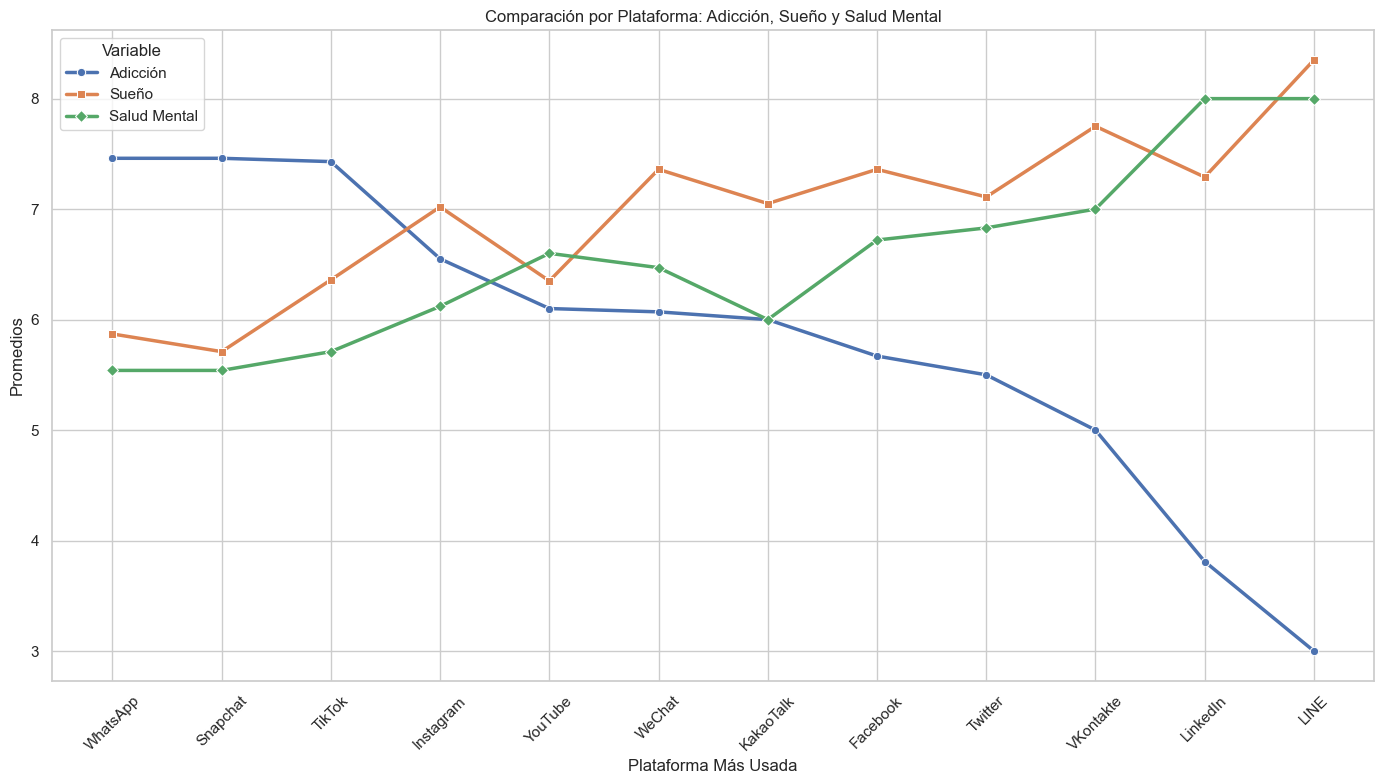

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar archivo resumen
df = pd.read_excel("data/Plataformas_Salud_Sueno_Adiccion_Resumen.xlsx")

# Reordenar columnas (opcional)
df = df[['Most_Used_Platform', 'Addicted_Score', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']]

# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Gráfico de líneas con marcadores
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Addicted_Score', label='Adicción', marker='o', linewidth=2.5)
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Sleep_Hours_Per_Night', label='Sueño', marker='s', linewidth=2.5)
sns.lineplot(data=df.sort_values(by='Addicted_Score', ascending=False), x='Most_Used_Platform', y='Mental_Health_Score', label='Salud Mental', marker='D', linewidth=2.5)

# Títulos y etiquetas
plt.title('Comparación por Plataforma: Adicción, Sueño y Salud Mental')
plt.ylabel('Promedios')
plt.xlabel('Plataforma Más Usada')
plt.xticks(rotation=45)
plt.legend(title='Variable')
plt.tight_layout()
plt.show()


📌 ¿Qué muestra el gráfico?
El gráfico representa tres líneas trazadas sobre las plataformas de redes sociales más utilizadas:

Línea 1 – Adicción (Addicted_Score): Nivel promedio de adicción por plataforma.

Línea 2 – Sueño (Sleep_Hours_Per_Night): Promedio de horas de sueño por noche.

Línea 3 – Salud Mental (Mental_Health_Score): Puntuación promedio de salud mental de los usuarios de cada red.

Todas las plataformas están ordenadas de mayor a menor nivel de adicción, lo que permite comparar visualmente cómo cambia el sueño y la salud mental a medida que aumenta la adicción digital.

📊 Interpretación Detallada
Plataformas como TikTok e Instagram:

Altos niveles de adicción (línea de adicción en la cima).

Bajas horas de sueño (línea de sueño más baja).

Peor salud mental (línea de salud mental también baja).

➤ Esto sugiere un patrón negativo claro: más adicción → menos sueño y peor salud mental.

Plataformas como LinkedIn o WhatsApp:

Menores niveles de adicción.

Más horas de sueño.

Mejor puntuación de salud mental.

➤ Indican un uso más saludable o moderado.

Cruces o separaciones entre líneas:

Cuando la línea de adicción se eleva y las otras bajan, confirma un patrón de impacto negativo.

Las plataformas con líneas casi paralelas y estables sugieren menor efecto adverso.

✅ Conclusión del Gráfico
Las plataformas no solo se diferencian por popularidad, sino también por el impacto que generan en la vida de los estudiantes.

El gráfico es una herramienta poderosa para identificar cuáles redes deberían ser foco de campañas de concientización.

Refuerza la importancia de educar sobre el uso balanceado de redes, en especial entre jóvenes que usan TikTok, Instagram y similares.



C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:18: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


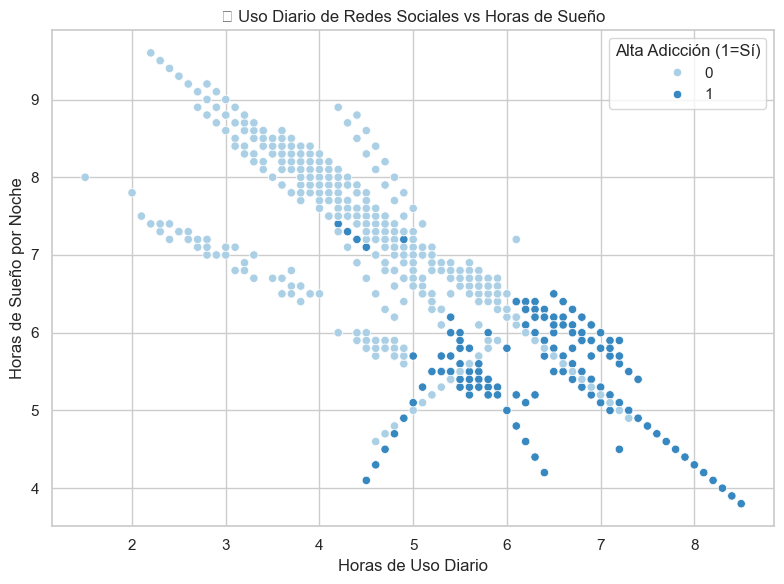

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Addiction', y='Mental_Health_Score', data=df, palette='Blues')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:27: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


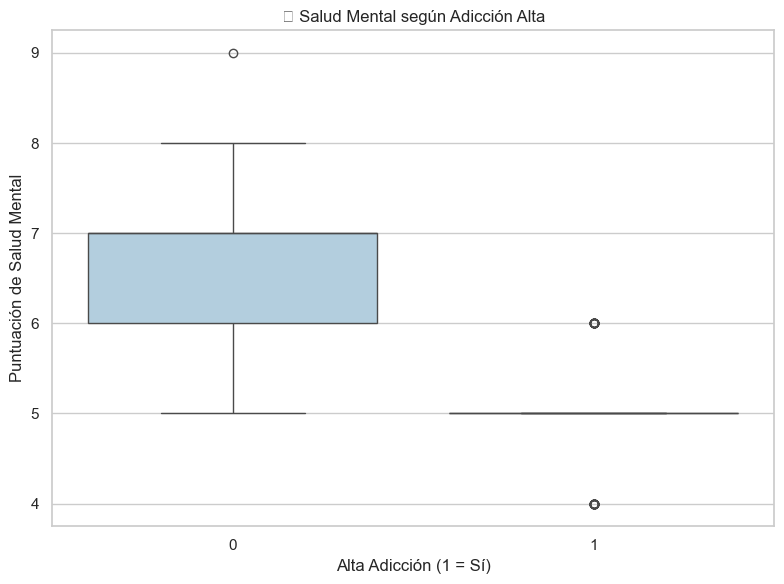

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_sleep_counts.index, y=low_sleep_counts.values, palette='Blues_d')
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:38: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


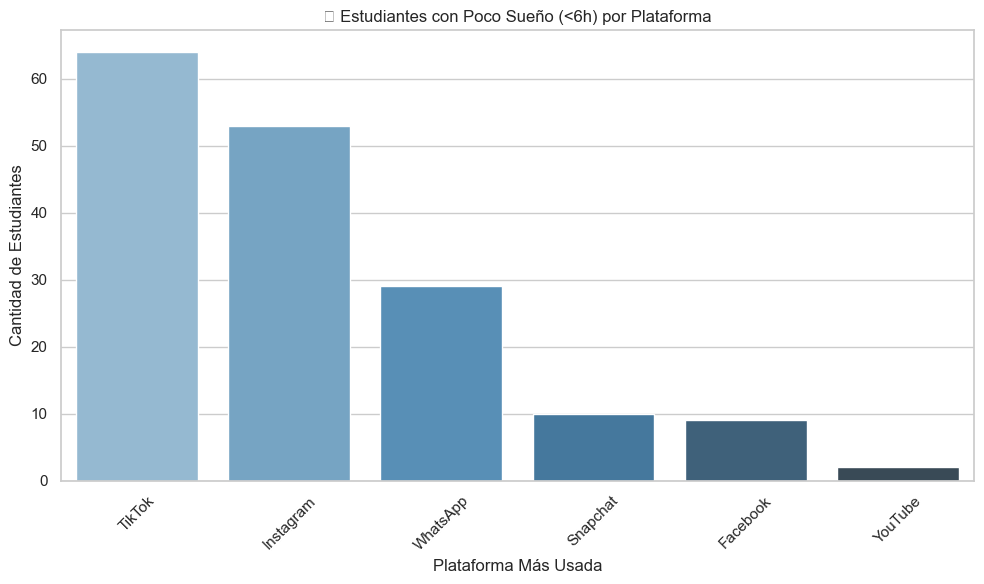

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:77: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


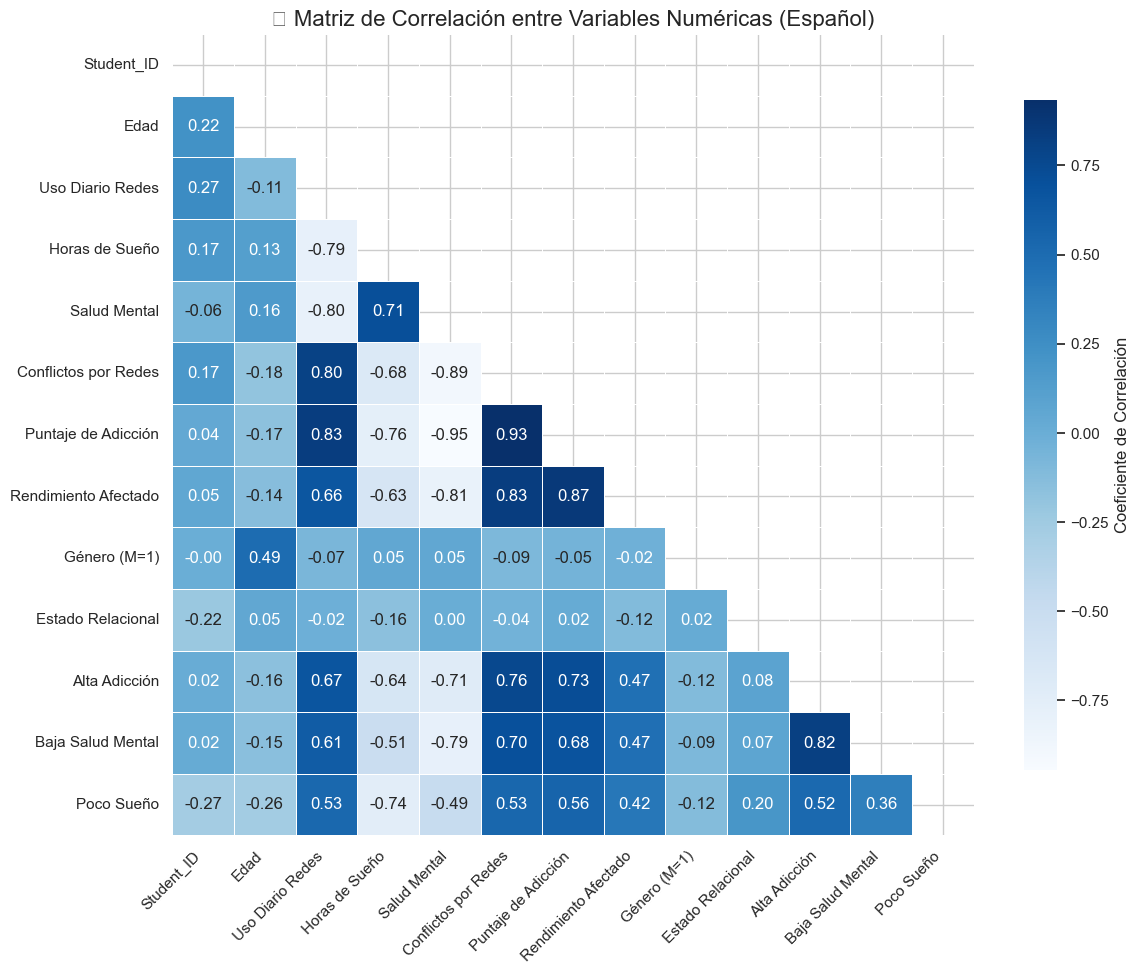

C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Code', y='Avg_Daily_Usage_Hours', data=df, palette='Blues', ax=axs[0])
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender_Code', y='Addicted_Score', data=df, palette='Blues', ax=axs[1])
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:93: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\I-MAG\AppData\Local\Temp\ipykernel_11876\2346253231.py:93: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_la

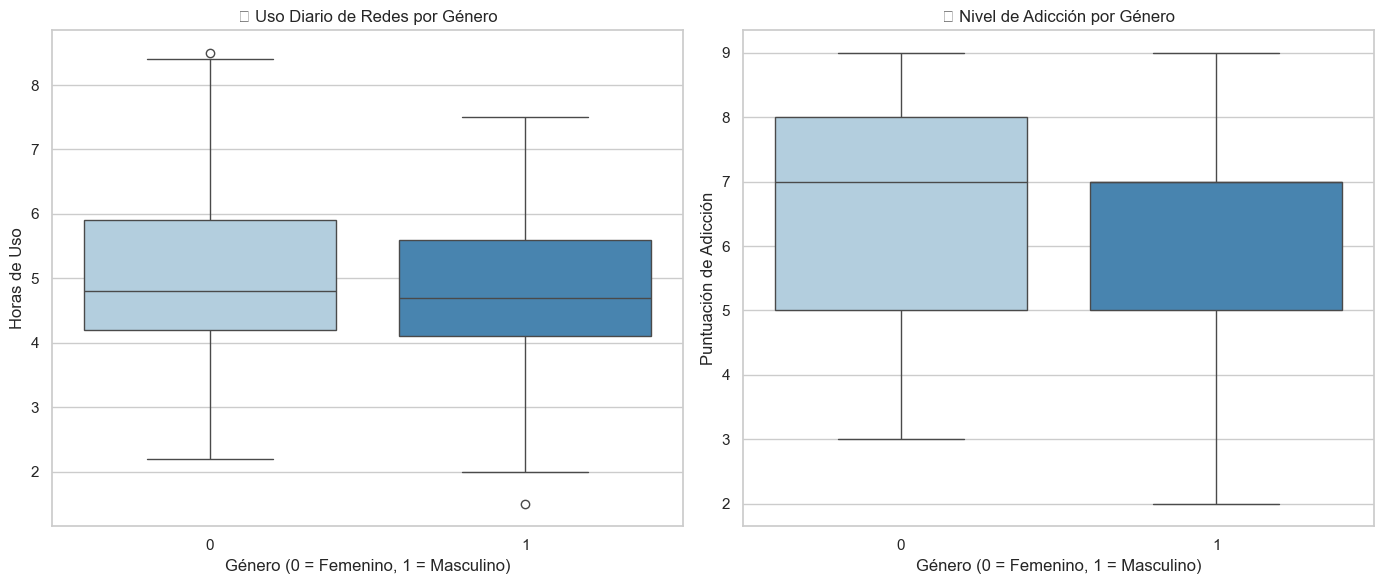

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo limpio transformado
df = pd.read_excel("data/Students_Social_Media_Transformed.xlsx")

# Estilo general
sns.set(style="whitegrid", palette="Blues")

# 1. Dispersión: Uso vs Sueño
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, hue='High_Addiction', palette='Blues')
plt.title('📉 Uso Diario de Redes Sociales vs Horas de Sueño')
plt.xlabel('Horas de Uso Diario')
plt.ylabel('Horas de Sueño por Noche')
plt.legend(title='Alta Adicción (1=Sí)')
plt.tight_layout()
plt.show()

# 2. Boxplot: Salud Mental por Nivel de Adicción
plt.figure(figsize=(8, 6))
sns.boxplot(x='High_Addiction', y='Mental_Health_Score', data=df, palette='Blues')
plt.title('🧠 Salud Mental según Adicción Alta')
plt.xlabel('Alta Adicción (1 = Sí)')
plt.ylabel('Puntuación de Salud Mental')
plt.tight_layout()
plt.show()

# 3. Barras: Estudiantes con poco sueño por plataforma
low_sleep_counts = df[df['Low_Sleep'] == 1]['Most_Used_Platform'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=low_sleep_counts.index, y=low_sleep_counts.values, palette='Blues_d')
plt.title('💤 Estudiantes con Poco Sueño (<6h) por Plataforma')
plt.ylabel('Cantidad de Estudiantes')
plt.xlabel('Plataforma Más Usada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Heatmap de variables binarias
# Calcular la matriz de correlación solo para variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Traducir los nombres de las columnas
columnas_traducidas = {
    'Age': 'Edad',
    'Avg_Daily_Usage_Hours': 'Uso Diario Redes',
    'Sleep_Hours_Per_Night': 'Horas de Sueño',
    'Mental_Health_Score': 'Salud Mental',
    'Conflicts_Over_Social_Media': 'Conflictos por Redes',
    'Addicted_Score': 'Puntaje de Adicción',
    'Academic_Performance_Affected': 'Rendimiento Afectado',
    'Gender_Code': 'Género (M=1)',
    'Relationship_Code': 'Estado Relacional',
    'High_Addiction': 'Alta Adicción',
    'Low_Mental_Health': 'Baja Salud Mental',
    'Low_Sleep': 'Poco Sueño'
}

# Renombrar para graficar
correlation_matrix.rename(columns=columnas_traducidas, index=columnas_traducidas, inplace=True)

# Crear la máscara triangular superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficar
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap='Blues',
    fmt=".2f", linewidths=0.5, square=True,
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de Correlación"}
)
plt.title('🔗 Matriz de Correlación entre Variables Numéricas (Español)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 5. Comparación por Género: uso y adicción
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender_Code', y='Avg_Daily_Usage_Hours', data=df, palette='Blues', ax=axs[0])
axs[0].set_title('📱 Uso Diario de Redes por Género')
axs[0].set_xlabel('Género (0 = Femenino, 1 = Masculino)')
axs[0].set_ylabel('Horas de Uso')

sns.boxplot(x='Gender_Code', y='Addicted_Score', data=df, palette='Blues', ax=axs[1])
axs[1].set_title('🎯 Nivel de Adicción por Género')
axs[1].set_xlabel('Género (0 = Femenino, 1 = Masculino)')
axs[1].set_ylabel('Puntuación de Adicción')

plt.tight_layout()
plt.show()


1. Gráfico de Dispersión – Uso de Redes vs Sueño
¿Qué muestra?:
Este gráfico representa la relación entre las horas diarias dedicadas a redes sociales y las horas de sueño por noche.

Interpretación:

Se observa una relación inversa clara: los estudiantes que usan redes por más horas tienden a dormir menos.

Los puntos coloreados indican si tienen alta adicción (High_Addiction = 1). La mayoría de estos puntos están agrupados en la zona de alto uso y poco sueño.

Esto sugiere que la adicción está relacionada directamente con una reducción del descanso nocturno.

2. Boxplot – Salud Mental por Nivel de Adicción
¿Qué muestra?:
Este gráfico compara la puntuación de salud mental entre estudiantes con y sin alta adicción.

Interpretación:

Los estudiantes sin alta adicción tienen medianas más altas de salud mental.

En cambio, quienes presentan High_Addiction = 1 tienen puntuaciones visiblemente más bajas.

Esto evidencia una asociación negativa entre adicción a redes y bienestar psicológico.

3. Gráfico de Barras – Poco Sueño por Plataforma
¿Qué muestra?:
Cantidad de estudiantes que duermen menos de 6 horas (Low_Sleep = 1), agrupados por la red social que más usan.

Interpretación:

TikTok y Instagram lideran en cantidad de usuarios con poco sueño.

Plataformas como LinkedIn o WhatsApp presentan mucho menor impacto negativo en el sueño.

Esto confirma que ciertas redes están más asociadas a privación de sueño, posiblemente por su contenido adictivo.

4. Mapa de Calor – Correlación entre Variables Derivadas
¿Qué muestra?:
Un heatmap con la correlación entre variables binarias generadas durante el ETL (High_Addiction, Low_Sleep, Low_Mental_Health, etc.).

Interpretación:

Alta correlación positiva entre High_Addiction y Low_Mental_Health → más adicción, peor salud mental.

Alta correlación también entre High_Addiction y Low_Sleep.

Gender_Code tiene correlación leve, lo que indica que el género influye, pero no de forma dominante.

5. Boxplots Comparativos – Género: Uso y Adicción
¿Qué muestra?:
Dos boxplots comparan:

Horas de uso diario

Nivel de adicción (Addicted_Score)

Interpretación:

Estudiantes masculinos (Gender_Code = 1) presentan ligeramente mayor uso diario y niveles más altos de adicción promedio.

Sin embargo, las diferencias no son extremas, por lo que el género es un factor relevante pero no decisivo.

✅ CONCLUSIÓN GENERAL
Los gráficos muestran que:

Mayor uso de redes → menos sueño y peor salud mental.

Las plataformas como TikTok e Instagram están especialmente relacionadas con efectos negativos.

La alta adicción digital tiene múltiples consecuencias psicológicas y físicas.

El género influye parcialmente, pero los impactos negativos son comunes entre todos los estudiantes con altos niveles de uso.